# Lecture 5  Classification Model I

In [1]:
# import necessary libraries and specify that graphs should be plotted inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## 1. Logistic Regression

Logistic regression is realized through 

**<center>sklearn.linear_model.LogisticRegression</center>**

- By default, **l2 regularization is applied**. Use penalty = 'none' if you do not want to include regularization.
- You can still use .coef_ and .intercept_ to get coefficient estimates.
- By default, .score reports the accuracy
- A new attribute is **.predict_proba**. It gives the predicted probability of y=1 (instead of the class).

### Setting and Data
We will use a standard dataset that predicts breast cancer for today's practice. Similar to the iris dataset, the breast_cancer dataset comes with Scikit-Learn package. This is a binary classification dataset (i.e., Y=1 if malignant, Y=0 if benign). We can use the same syntax to learn about the breast_cancer dataset (e.g., variables, observations, etc.) 

It's description can also be found at: <center>https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer</center>



**Practice:** 
- Explore the cancer dataset, how many observations & variables are there?
- Data Splitting - 30% to test and 70% to train.
- Predict y with logistic regression and l2 regularization. Report the coefficients (including intercept).
- Report the accuracy of training and test set.
    - Hint: you can use .score(x, y) method to get accuracy. As accuracy is default measure for binary outcomes.
- Suppose another classifier: it classifies all records to class zero. What would be the accuracy? 

In [2]:
# Exploring dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.keys()) # Check elements in cancer dataset: data is X, target is y.
print(cancer.data.shape)
# print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# Data Splitting, check sample
from sklearn.model_selection import train_test_split
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(np.mean(y_train), np.mean(y))###Check for imbalance...Proportion of 1s in both datasets

0.6256281407035176 0.6274165202108963


In [5]:
from sklearn.linear_model import LogisticRegression
# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient.
logreg = LogisticRegression()##if penalization is not needed, set penalty = 'none'
logreg.fit(X_train,y_train)

logreg.coef_, logreg.intercept_
## (b) Accuracy
print("Accuracy is:", logreg.score(X_test, y_test))

# Get it manually
y_test_pred = logreg.predict(X_test)
accuracy_manual = np.sum(y_test_pred == y_test)/y_test.shape
accuracy_manual


Accuracy is: 0.9707602339181286


array([0.97076023])

In [ ]:
# Suppose another classifier: it classifies all records to class zero. What would be the accuracy?



## 2. Model Evaluation
We have several ways to evaluate a classification model. 

### 2.1 Confusion Matrix
It is often good start from **Confusion Matrix**, which provides the source (e.g., TP, TN, FP, FN) to calculate other measures. Checking the patterns of confusion matrix can also help understand which type of error is more likely to occur (FP or FN) and the potential reasons (classifier's issue or data issue).

To generate confusion matrix, we use syntax:
**<center>sklearn.metrics.confusion_matrix(Actual_y, Predicted_y)</center>**

- The rows represents actual class, and columns represent predicted class. 
- For the upper-left corner, predicted = actual = 0

**Practice:**
- Create a confusion matrix for the logistic regression model, report the TP, FP ,TN, FN.



In [6]:
from sklearn.metrics import confusion_matrix
logreg_matrix = confusion_matrix(y_test, y_test_pred)
logreg_matrix

array([[ 59,   4],
       [  1, 107]])

In [7]:
print("TP is:", logreg_matrix[1,1])
print("TN is:", logreg_matrix[0,0])
print("FP is:", logreg_matrix[0,1])
print("FN is:", logreg_matrix[1,0])

TP is: 107
TN is: 59
FP is: 4
FN is: 1


### Additional Performance Measures
We can obtain different performance measures, **Accuracy, Precision, Recall, F1 score**, using Scikit-Learn. The syntax is very similar to confusion matrix. Specifically, we can simply replace "confusion_matrix" by [accuracy_score, precision_score, recall_score, and f1_score]. Thus:

<center>sklearn.metrics.accuracy_score(Actual_y, Predicted_y)</center>
<center>sklearn.metrics.precision_score(Actual_y, Predicted_y)</center>
<center>sklearn.metrics.recall_score(Actual_y, Predicted_y)</center>
<center>sklearn.metrics.f1_score(Actual_y, Predicted_y)</center>

**Practice:**

- Given the logistic regression trained in the previous section, calculate and print the precision, recall, accuracy, and f1_score

In [8]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.963963963963964
Recall score: 0.9907407407407407
Accuracy score: 0.9707602339181286
F1 score: 0.9771689497716894


### Visualization
We consider two methods for visualization: Precision-Recall Curve, and ROC Curve. Recall that to draw the figure, we need to calculate the probability of Y=1 for each record. Thus, we need to first obtain the predicted probability of Y=1 using the .predict_proba method:

**<center>MODEL_NAME.predict_proba(INPUT_DATA)[:,1]</center>**
- "[:,1]" takes the second column of the output (the first column is P(Y=0))
- The list of probabilities can be used to draw figures.

#### For Precision-Recall Curve: 
 - Use **sklearn.metrics.precision_recall_curve(Actual_Y, Probability)** 
 - Output: a list of necessary measures (following this order): [precision, recall, threshold]
 - Plot the figure (e.g., plt.plot()).
 
#### For ROC Curve: 
 - Use **sklearn.metrics.precision_recall_curve(Actual_Y, Probability)** 
 - Output: a list of necessary measures (following this order): [fpr (1-specificity), tpr (recall), threshold]
 - Plot the figure (e.g., plt.plot()).
 - We can also get AUC score using     **sklearn.metrics.roc_auc_score(Actual_Y, Probability)**

**Practice:**

1. Plot the Precision-Recall Curve
2. Plot the ROC Curve
3. Obtain the AUC score

Text(0, 0.5, 'precision')

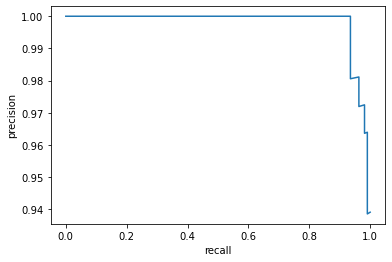

In [23]:
# Practice 1: Here we plot the Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

# S1. Get probability
logreg.predict_proba(X_test) # 1-pi_hat, pi_hat
pi_hat = logreg.predict_proba(X_test)[:,1]
# S2. Collect Necessary Measures
precision, recall, threshold = precision_recall_curve(y_test,pi_hat)

# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')

In [ ]:
from sklearn.metrics import roc_auc_score

# we have obtained the predicted probability in the previous step: y_pred_proba



print("AUC for logistic regression:",   )

Text(0, 0.5, 'TPR')

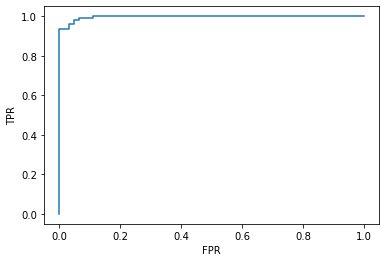

In [24]:
# Practice 2: Similar to ROC-Recall Curve

from sklearn.metrics import roc_curve

# Predicted Probability: pi_hat
# Get Measures
fpr, tpr, threshold_roc = roc_curve(y_test,pi_hat)
# Generate Figure
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
print('AUC for log reg:', roc_auc_score(y_test,pi_hat))

AUC for log reg: 0.9966196355085244


## 3. K-Nearest Neighbor



KNN is realized through:
**<center>sklearn.neighbors.KNeighborsClassifier(n_neighbors)</center>**
- n_neighbors: how many neighbors (k)
- p: the distance measure. p=2 for euclidean distance (default), p=1 for manhattan distance.

After training the model with .fit method, you can use .predict and .score for prediction and performance report. You can also use .kneighbors to find the neighbors and corresponding distances for a (set of) new point(s). Note that this feature is not available if you use GridSearchCV.

*Extension:To use KNN for regression purpose, check: sklearn.neighbors.KNeighborsRegressor.*

### IRIS EXAMPLE: 3 classes
IRIS dataset consists of 3 different types of irises (Setosa, Versicolour, and Virginica). There are 150 observations and 4 features: Sepal Length, Sepal Width, Petal Length and Petal Width. The features are stored in a 150x4 2D numpy array. The target is a 1D numpy array indicating the type of each iris.

**Practice:**
- Load the data and get a general idea of the dataset
- We will use the first two features to predict the iris type. Define X and Y (complete dataset), and create a scatter plot to show the relationship between the features and iris types.
- Split the dataset, use knn where k=3 for classification, report accuracy for test set.
- Use cross-validation to find the best k among all odd numbers between 3 and 25 (inclusive). Report the mean validation score of the chosen model through CV process. Also report the test score of the chosen model.

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.data.shape)
print(iris.target_names) # three classes

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
['setosa' 'versicolor' 'virginica']


In [10]:
## Data Visualization:
X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

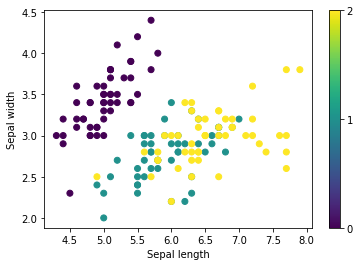

In [11]:
## Visualization of the data set

X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.colorbar(ticks = [0,1,2])

In [12]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [14]:
# Train a k-NN model with k = 3
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)
knn3.score(X_test,y_test)

0.7631578947368421

In [16]:
knn3.predict(X_test)

array([1, 0, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1,
       0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0])

In [15]:
X_new=[[5,5]]
knn3.predict(X_new)

array([0])

In [17]:
knn3.kneighbors(X_new)

#First array is the distance
#Second array is the index of the nearest neighbors

(array([[0.92195445, 0.94339811, 1.17046999]]), array([[ 1, 33,  5]]))

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define function
knn = KNeighborsClassifier()

# define a list of parameters
param_knn = {'n_neighbors': [num for num in range(3,26,2)]}  # exactly the same as the input variable name. 

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5)
grid_knn.fit(X_train,y_train)
# the best hyperparameter chosen:
print("Best k is:",grid_knn.best_params_)

# When k=25 (best case), the validation score of through CV is:
print("Mean Validation score is:",grid_knn.best_score_)


Best k is: {'n_neighbors': 25}
Mean Validation score is: 0.7770750988142293


In [23]:
grid_knn.best_estimator_.kneighbors(X_new)

(array([[0.92195445, 0.94339811, 1.17046999, 1.17046999, 1.20415946,
         1.20415946, 1.28062485, 1.30384048, 1.33416641, 1.36014705,
         1.4       , 1.40356688, 1.5       , 1.5       , 1.50332964,
         1.50332964, 1.6       , 1.60312195, 1.61245155, 1.61245155,
         1.64924225, 1.64924225, 1.7       , 1.70293864, 1.8       ]]),
 array([[  1,  33,   5,  40,  20,  76, 109,  90,  86,   6,   0,  94,  50,
          19,  15,  63,  49,  27,  18,  23,  67, 106,  43,  25,  44]]))